In [4]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import college_admissions_experiments as script
import ipdb
import pdb
import pandas as pd
import tqdm.notebook as tqdm
from multiprocessing import Pool
import seaborn as sns


In [2]:
args = script.get_args(
    '--n-cores 1 --num-repeat 1 --num-applicants 100000 --applicants-per-round 1000 --fixed-effort-conversion --scaled-duplicates sequence --b-bias 2 --num-envs 2 --pref uniform --experiment-root protocol-exps --test-run --generate 1 --stream --no-protocol'
)
np.random.seed(0)
b, x, y, EW, theta, w, z, y_hat, adv_idx, disadv_idx, o, theta_star, pref_vect  = script.generate_data(
    args.num_applicants, args.admit_all, args.applicants_per_round, args.fixed_effort_conversion, args
            )
theta_star[0]

array([0.        , 0.85281047])

In [3]:
# for i in range(args.num_envs):
    # print(f'env {i+1}')
    # theta_env = theta[i, :,]
    # for j in range(0, args.num_applicants, args.applicants_per_round*2):
        # idx = j
        # idx2 = j + args.applicants_per_round
        # print(theta_env[idx])
        # print(theta_env[idx2])
        # print(theta_env[idx2] / theta_env[idx])
        # print()

In [4]:
from scipy.stats import ttest_ind
condition = 'w'
def test(vect, args, condition, show_first_env=True, plot=False):
    assert vect.shape == (args.num_applicants,)
    assert z.shape == (args.num_applicants, )
    assert condition in ('z', 'w')
    out1, out2 = [], []
    for env_idx in range(args.num_envs if not show_first_env else 1):
        for i in range(0, args.num_applicants, args.applicants_per_round*2):

            low1, up1 = i, i+args.applicants_per_round
            low2, up2 = up1, up1+args.applicants_per_round
            w_t1 = w[env_idx][low1:up1]
            w_t2 = w[env_idx][low2:up2]
    
            z_t1 = z[low1:up1]
            z_t2 = z[low2:up2]

            vect_t1 = vect[low1:up1]
            vect_t2 = vect[low2:up2]
            if condition == 'w':
                c1 = w_t1 == 1
                c2 = w_t2 == 1
            elif condition == 'z':
                c1 = z_t1 == env_idx+1
                c2 = z_t2 == env_idx+1
            data1 = vect_t1[c1]
            data1mean = data1.mean()
            data2 = vect_t2[c2]
            data2mean = data2.mean()

            if show_first_env and plot:
                _,ax=plt.subplots(ncols=1 if show_first_env else 2,nrows=2, sharex=True, sharey=True)
                ax[0].hist(data1, bins='auto')
                ax[0].axvline(x=data1mean, color='k')
                ax[0].set_title(f'env {env_idx}, round t')
                ax[1].hist(data2, bins='auto' )
                ax[1].axvline(x=data2mean, color='k')
                ax[1].set_title(f'env {env_idx}, round t+1')
    
            m1, m2 = data1.mean(), data2.mean()
            _, pval = ttest_ind(data1, data2, axis=0, equal_var=False, nan_policy='raise')
            print(f'm1 = {m1:.2f}, m2 = {m2:.2f}, pval = {pval}')
            out1.append(m1-m2)
            out2.append(pval)
    return np.array(out1), np.array(out2)

n_rounds = args.num_applicants / args.applicants_per_round
# meandiffs, pvals = test(b.dot(theta_star[0]), args, condition='w', plot=False)
# fig,ax=plt.subplots(ncols=2)
# ax[0].hist(meandiffs, bins=50)
# out, _, _ = ax[1].hist(pvals, bins=50 )

m1 = 2.58, m2 = 2.51, pval = 0.3366284176411112
m1 = 2.34, m2 = 2.50, pval = 0.017747662188821286
m1 = 2.56, m2 = 2.67, pval = 0.08875771869792436
m1 = 2.82, m2 = 2.69, pval = 0.021545296916617558
m1 = 2.65, m2 = 2.75, pval = 0.09538543917523863
m1 = 2.42, m2 = 2.67, pval = 0.00022677036984505215
m1 = 2.66, m2 = 2.77, pval = 0.06829200073109064
m1 = 2.73, m2 = 2.70, pval = 0.6581862003122383
m1 = 2.57, m2 = 2.68, pval = 0.08569324883098882
m1 = 1.64, m2 = 1.75, pval = 0.02306759170042236
m1 = 2.68, m2 = 2.74, pval = 0.21008539602185305
m1 = 2.69, m2 = 2.74, pval = 0.39233163802024384
m1 = 1.82, m2 = 1.81, pval = 0.8471033568199883
m1 = 2.68, m2 = 2.82, pval = 0.011772422700773149
m1 = 2.64, m2 = 2.67, pval = 0.5039320171146089
m1 = 1.92, m2 = 1.82, pval = 0.07882875363326783
m1 = 2.78, m2 = 2.72, pval = 0.3764430883781634
m1 = 2.70, m2 = 2.65, pval = 0.3541542534371025
m1 = 2.65, m2 = 2.65, pval = 0.9891106312528141
m1 = 2.52, m2 = 2.70, pval = 0.0018457387526994642
m1 = 2.03, m2 = 2.0

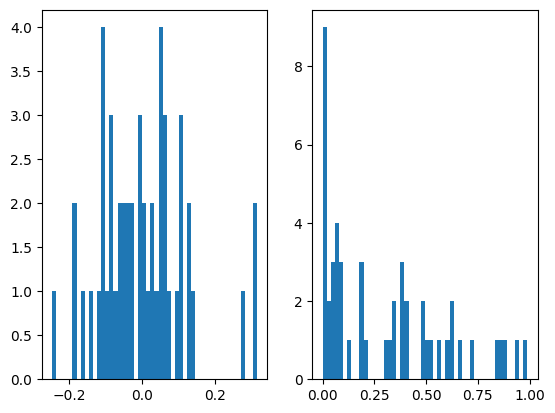

In [5]:
meandiffs, pvals = test(b.dot(theta_star[0]), args, condition='z', plot=False)
fig,ax=plt.subplots(ncols=2)
n_rounds = args.num_applicants / args.applicants_per_round
n_rounds = int(n_rounds/2)
ax[0].hist(meandiffs, bins=n_rounds)
out, _, _ = ax[1].hist(pvals, bins=n_rounds)

m1 = 0.19, m2 = 0.15, pval = 0.31233424850710884
m1 = 0.05, m2 = 0.13, pval = 0.03559139628357498
m1 = 0.13, m2 = 0.21, pval = 0.08256545524041514
m1 = 0.25, m2 = 0.19, pval = 0.061319779789818
m1 = 0.15, m2 = 0.21, pval = 0.14540397022846707
m1 = 0.08, m2 = 0.21, pval = 0.001523931763953154
m1 = 0.20, m2 = 0.26, pval = 0.06327799067036007
m1 = 0.22, m2 = 0.24, pval = 0.5892034961537007
m1 = 0.14, m2 = 0.21, pval = 0.07231913779634287
m1 = -0.37, m2 = -0.31, pval = 0.07088581650982335
m1 = 0.22, m2 = 0.25, pval = 0.40060480589921055
m1 = 0.20, m2 = 0.22, pval = 0.6182320964230446
m1 = -0.26, m2 = -0.24, pval = 0.6092353642918915
m1 = 0.18, m2 = 0.22, pval = 0.2861333850361644
m1 = 0.15, m2 = 0.22, pval = 0.10047905910683169
m1 = -0.17, m2 = -0.21, pval = 0.2717662998775966
m1 = 0.21, m2 = 0.19, pval = 0.6069090966085805
m1 = 0.21, m2 = 0.15, pval = 0.14034991783223597
m1 = 0.20, m2 = 0.19, pval = 0.8544338249926862
m1 = 0.13, m2 = 0.22, pval = 0.03025660501877179
m1 = -0.14, m2 = -0.06

(array([5., 2., 2., 5., 3., 2., 0., 3., 0., 1., 0., 0., 1., 1., 1., 2., 0.,
        0., 0., 0., 2., 1., 0., 0., 0., 1., 1., 2., 1., 1., 2., 2., 0., 0.,
        0., 2., 1., 0., 1., 0., 1., 0., 2., 0., 1., 0., 0., 0., 0., 1.]),
 array([1.10655041e-04, 1.99823319e-02, 3.98540088e-02, 5.97256857e-02,
        7.95973626e-02, 9.94690395e-02, 1.19340716e-01, 1.39212393e-01,
        1.59084070e-01, 1.78955747e-01, 1.98827424e-01, 2.18699101e-01,
        2.38570778e-01, 2.58442455e-01, 2.78314132e-01, 2.98185809e-01,
        3.18057485e-01, 3.37929162e-01, 3.57800839e-01, 3.77672516e-01,
        3.97544193e-01, 4.17415870e-01, 4.37287547e-01, 4.57159224e-01,
        4.77030901e-01, 4.96902578e-01, 5.16774254e-01, 5.36645931e-01,
        5.56517608e-01, 5.76389285e-01, 5.96260962e-01, 6.16132639e-01,
        6.36004316e-01, 6.55875993e-01, 6.75747670e-01, 6.95619347e-01,
        7.15491023e-01, 7.35362700e-01, 7.55234377e-01, 7.75106054e-01,
        7.94977731e-01, 8.14849408e-01, 8.34721085e-01

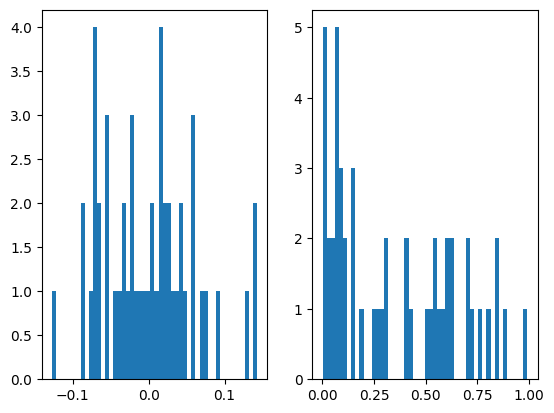

In [8]:
meandiffs,pvals=test(o[0], args, condition='z', plot=False)
fig,ax=plt.subplots(ncols=2)

n_rounds = args.num_applicants / args.applicants_per_round
n_rounds = int(n_rounds/2)
ax[0].hist(meandiffs, bins=n_rounds)
ax[1].hist(pvals,bins=n_rounds)

In [5]:
def _run(seed, num_applicants, applicants_per_round, stream):
    row = {}
    for no_protocol in (True, False):
        cmd = f'--n-cores 1 --num-repeat 1 --num-applicants {num_applicants} --applicants-per-round {applicants_per_round} --fixed-effort-conversion --scaled-duplicates sequence --b-bias 2 --num-envs 2 --pref uniform --test-run --generate 1'
        if no_protocol:
            cmd = f'{cmd} --no-protocol'
        if stream:
            cmd = f'{cmd} --stream'
        args = script.get_args(cmd)
        np.random.seed(seed)
        b, x, y, EW, theta, w, z, y_hat, adv_idx, disadv_idx, o, theta_star, pref_vect  = script.generate_data(
            args.num_applicants, args.admit_all, args.applicants_per_round, args.fixed_effort_conversion, args
            )

        # considering only the first env.
        env_idx = 0 
        y_env = y[env_idx].flatten() 
        theta_env = theta[env_idx]
        z_env = z==env_idx+1
        
        # final data point or as a function on a range of students/ 
        if args.stream:
            upp_limits = [x for x in range(applicants_per_round*2, num_applicants+1, applicants_per_round)]
        else:
            upp_limits = [num_applicants]
        
        err_list = [None] * len(upp_limits)
        for i, t in tqdm.tqdm(enumerate(upp_limits)):
            # limiting to currently "total students"
            x_round = x[:t]
            y_env_round = y_env[:t]
            z_env_round = z_env[:t]
            theta_env_round = theta_env[:t]

            # picking out only the selected student
            y_env_round_selected = y_env_round[z_env_round]
            # print(x_round.shape, y_env_round.shape, z_env_round.shape, theta_env_round.shape, y_env_round_selected, z_env_round.sum() )

            est = script.our2(x_round, y_env_round_selected, theta_env_round, z_env_round)
            assert theta_star[0].shape == est.shape, f"{theta[0].shape}, {est.shape}"
            err_list[i] = np.linalg.norm(theta_star[0] - est )

        row['no-protocol' if no_protocol else 'protocol'] = err_list
    return row


In [15]:
_dfs = []

for apr in tqdm.tqdm((100, 250, 500, 1000)):
    n_runs = 10
    stream = False
    n_rounds = 100
    args_list = [(s, apr*n_rounds, apr, stream) for s in np.arange(n_runs)]
    with Pool(n_runs) as p:
        runs = p.starmap(_run, args_list )

    # adding iteration column
    for run in runs:
        assert len(run['no-protocol'])==  len(run['protocol'])
        iters = np.arange(len(run['no-protocol']))
        run['iters'] = iters

    # create dataframe for this apr.
    dfs = []
    for run in runs:
        df = pd.DataFrame(run)
        dfs.append(df)
    df = pd.concat(dfs)
    df['apr'] = apr
    df

    # combine with rest of the dfs
    _dfs.append(df)
df = pd.concat(_dfs)
df 

  0%|          | 0/4 [00:00<?, ?it/s]

,no-protocol,protocol,iters,apr
0,0.030214,0.055460,0,100
0,0.002044,0.084439,0,100
0,0.040955,0.078207,0,100
0,0.000742,0.052627,0,100
0,0.050245,0.075115,0,100
0,0.005036,0.001530,0,100
0,0.006882,0.041766,0,100
0,0.017795,0.075350,0,100
0,0.036239,0.021701,0,100
0,0.001161,0.068516,0,100


In [16]:
df = pd.melt(
    df, id_vars=('iters', 'apr'), value_vars=('no-protocol', 'protocol'), var_name='method', value_name='error'
)


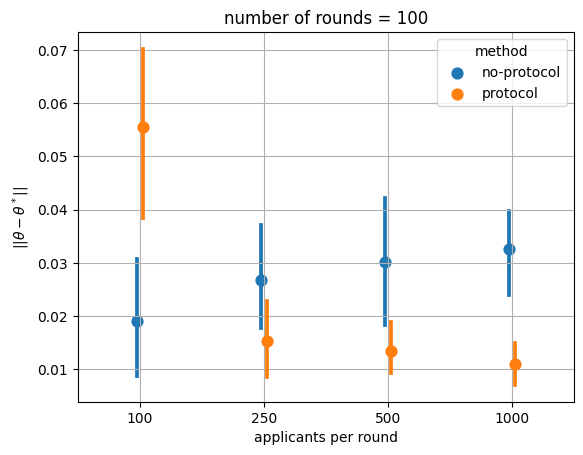

In [18]:
fig,ax=plt.subplots()
sns.pointplot(
    data=df, x='apr', y='error', hue='method' ,join=False, dodge=True, ax=ax
)
ax.set_xlabel('applicants per round')
ax.set_ylabel(r'$|| \theta - \theta^*|| $')
ax.grid() 

ax.set_title('number of rounds = 100')
plt.savefig('figures/apr.pdf')

In [19]:
_dfs = []

for n_rounds in tqdm.tqdm((100, 200, 500, 1000)):
    n_runs = 10
    stream = False
    apr = 500
    args_list = [(s, apr*n_rounds, apr, stream) for s in np.arange(n_runs)]
    with Pool(n_runs) as p:
        runs = p.starmap(_run, args_list )

    # adding iteration column
    for run in runs:
        assert len(run['no-protocol'])==  len(run['protocol'])
        iters = np.arange(len(run['no-protocol']))
        run['iters'] = iters

    # create dataframe for this n_rounds.
    dfs = []
    for run in runs:
        df = pd.DataFrame(run)
        dfs.append(df)
    df = pd.concat(dfs)
    df['n_rounds'] = n_rounds
    df

    # combine with rest of the dfs
    _dfs.append(df)
df = pd.concat(_dfs)
df 

  0%|          | 0/4 [00:00<?, ?it/s]

,no-protocol,protocol,iters,n_rounds
0,0.043089,0.014610,0,100
0,0.041608,0.013919,0,100
0,0.029707,0.027300,0,100
0,0.046382,0.003546,0,100
0,0.014995,0.028409,0,100
0,0.065148,0.007739,0,100
0,0.003253,0.011258,0,100
0,0.001615,0.008981,0,100
0,0.021761,0.014090,0,100
0,0.033607,0.005304,0,100


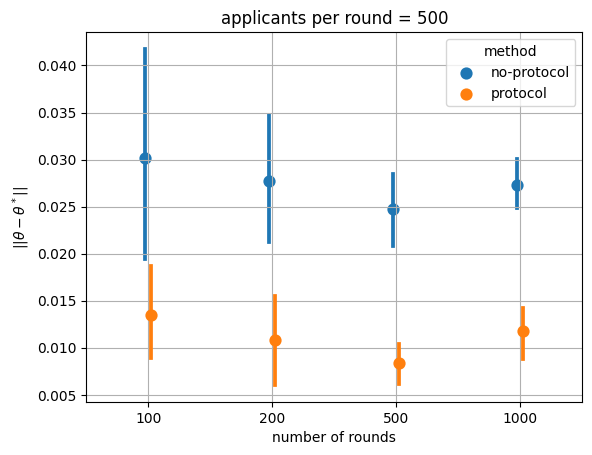

In [21]:
dflong = pd.melt(
    df, id_vars=('iters', 'n_rounds'), value_vars=('no-protocol', 'protocol'), var_name='method', value_name='error'
)
fig,ax=plt.subplots()
sns.pointplot(
    data=dflong, x='n_rounds', y='error', hue='method' ,join=False, dodge=True, ax=ax
)
ax.set_xlabel('number of rounds')
ax.set_ylabel(r'$|| \theta - \theta^*|| $')
ax.grid() 

ax.set_title('applicants per round = 500')
plt.savefig('figures/apr2.pdf')

In [11]:
apr = 1000 
n_rounds = 300
n_runs = 10
stream=True
args_list = [(s, apr*n_rounds, apr, stream) for s in np.arange(n_runs)]
with Pool(n_runs) as p:
    runs = p.starmap(_run, args_list )


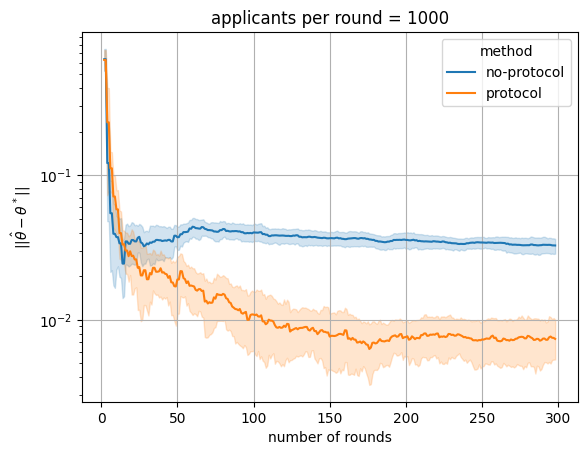

In [15]:
# adding iteration column
for run in runs:
    assert len(run['no-protocol'])==  len(run['protocol'])
    iters = np.arange(len(run['no-protocol']))
    run['iters'] = iters

# create dataframe for this n_rounds.
dfs = []
for run in runs:
    df = pd.DataFrame(run)
    dfs.append(df)
df = pd.concat(dfs)
df

dflong = pd.melt(df, id_vars=('iters',), value_vars=('no-protocol', 'protocol'), var_name='method', value_name='error')
fig,ax=plt.subplots()
sns.lineplot(
    data=dflong, x='iters', y='error', hue='method', ax=ax
)
ax.set_yscale('log')
ax.grid()

ax.set_xlabel('number of rounds')
ax.set_title('applicants per round = 1000')
ax.set_ylabel(r'$||\hat{\theta} - \theta^*||$')

plt.savefig('figures/protocol.pdf')